In [1]:
#preamble 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor


n = 2
q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
qc = []
qc.append(QuantumCircuit(q, c))



count = 0
for i in range(10):
    for j in range(5):
        qc[count].id(0)
        qc[count].id(1)
        qc.append(QuantumCircuit(q,c))
    count = count + 1

# Do it for both qubits
       





In [2]:
#defining circuits
qc = []
    



for i in range(5,25):  # no. of circuits
    n = 2
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    qc.append(QuantumCircuit(q,c))
    for j in range(7):
        qc[i-5].id(0)
        qc[i-5].id(1)
 
for i in range(20):
    qc[i].measure(q,c)

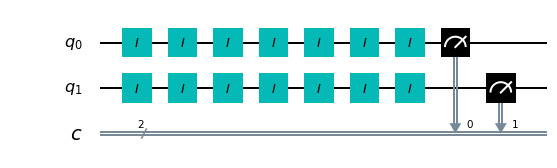

In [3]:
#checking the output
qc[19].draw(output = "mpl")


In [4]:
#saving account
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-10-20 09:55:17,666: Credentials already present. Set overwrite=True to overwrite.


In [5]:
#loading account
IBMQ.load_account()
IBMQ.providers()


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
#checking backends
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
#submitting the circuit to IBM Q
backend = provider.get_backend('ibmq_ourense')

job_exp = qiskit.execute(qc,backend=backend,shots = 8132)




In [8]:
#checking the job
job_monitor(job_exp)


Job Status: job has successfully run                        


In [28]:
#checking the result
output = job_exp.result().get_counts()
output

#00:1, 10:2, 11:3, 01:4


[{'11': 6, '10': 255, '01': 78, '00': 7793},
 {'11': 2, '10': 238, '01': 73, '00': 7819},
 {'11': 2, '10': 243, '01': 73, '00': 7814},
 {'11': 2, '10': 242, '01': 91, '00': 7797},
 {'11': 1, '10': 248, '01': 70, '00': 7813},
 {'11': 3, '10': 232, '01': 68, '00': 7829},
 {'11': 2, '10': 241, '01': 71, '00': 7818},
 {'11': 7, '10': 225, '01': 76, '00': 7824},
 {'11': 5, '10': 226, '01': 73, '00': 7828},
 {'11': 2, '10': 230, '01': 77, '00': 7823},
 {'11': 1, '10': 243, '01': 73, '00': 7815},
 {'11': 6, '10': 235, '01': 71, '00': 7820},
 {'11': 5, '10': 237, '01': 63, '00': 7827},
 {'10': 214, '01': 81, '00': 7837},
 {'11': 7, '10': 234, '01': 78, '00': 7813},
 {'11': 6, '10': 231, '01': 82, '00': 7813},
 {'11': 7, '10': 251, '01': 67, '00': 7807},
 {'11': 2, '10': 192, '01': 57, '00': 7881},
 {'11': 2, '10': 221, '01': 81, '00': 7828},
 {'11': 2, '10': 246, '01': 60, '00': 7824}]

In [29]:
#creating dataframe
import pandas as pd
df = pd.DataFrame(output)
print (df)


     11   10  01    00
0   6.0  255  78  7793
1   2.0  238  73  7819
2   2.0  243  73  7814
3   2.0  242  91  7797
4   1.0  248  70  7813
5   3.0  232  68  7829
6   2.0  241  71  7818
7   7.0  225  76  7824
8   5.0  226  73  7828
9   2.0  230  77  7823
10  1.0  243  73  7815
11  6.0  235  71  7820
12  5.0  237  63  7827
13  NaN  214  81  7837
14  7.0  234  78  7813
15  6.0  231  82  7813
16  7.0  251  67  7807
17  2.0  192  57  7881
18  2.0  221  81  7828
19  2.0  246  60  7824


In [30]:
#location
path = '/Users/student/Documents/summer_research/circuit_results/project2/'

In [31]:
#saving to csv file
df.to_csv(path + '7_idgates.csv')

In [32]:
#finding the probabilty for p00,p01,p10,p11
for i in range(len(output)):
    if '00' in output[i]:
        output[i]['00'] = output[i]['00']/8132
    if '01' in output[i]:
        output[i]['01'] = output[i]['01']/8132
    if '10' in output[i]:
        output[i]['10'] = output[i]['10']/8132
    if '11' in output[i]:
        output[i]['11'] = output[i]['11']/8132
        
 

#Reason behind relative entropy (defining p_0,p_0',p_1,p_1'  to get q00,q01,...)
p_00 = p_0 * p_0’

Independent events: 


In |0>

p_0 = p_00 + p_10
p_1 = p_01 + p_11


In |1>

p_0’ = p_00 + p_01
p_1’ = p_10 + p_11




If we have independent events:

p_0 * p_0’ = q00
p_0 * p_1’ = q10
p_1 * p_0’ = q01
p_1 * p_1’ = q11


If equal then no correlation. If deviation between two of them then it gives us the correlation.




Syntax:
p_x’ = prob of measuring of getting x in the second qubit(|1>)
p_x =  prob of measuring of getting x in the first qubit(|0>)




In [33]:
#creating list for p_0,p_0_, p_1, p_1_
p_0 = []
p_0_ = []
p_1 = []
p_1_ = []

for i in range(len(output)):
    if '00' in output[i] and '01' in output[i]:
        p_0_.append(output[i]['00'] + output[i]['01'])
    elif '00' in output[i]:
        p_0_.append(output[i]['00'])
    elif '01' in output[i]:
        p_0_.append(output[i]['00'])
    else:
        p_0_.append(0)
    if '10' in output[i] and '11' in output[i]:
        p_1_.append(output[i]['10'] + output[i]['11'])
    elif '10' in output[i]:
        p_1_.append(output[i]['10'])
    elif '11' in output[i]:
        p_1_.append(output[i]['11'])
    else:
        p_1_.append(0)
    if '00' in output[i] and '10' in output[i]:
        p_0.append(output[i]['00'] + output[i]['10'])
    elif '00' in output[i]:
        p_0.append(output[i]['00'])
    elif '10' in output[i]:
        p_0.append(output[i]['10'])
    else:
        p_0.append(0)
    if '01' in output[i] and '11' in output[i]:
        p_1.append(output[i]['01'] + output[i]['11'])
    elif '01' in output[i]:
        p_1.append(output[i]['01'])
    elif '11' in output[i]:
        p_1.append(output[i]['11'])
    else:
        p_1.append(0)
        


In [34]:
 p_1_[9] + p_0_[9]

1.0

In [35]:
#double checking the length of p_0, p_1...
len(p_0),len(p_0_),len(p_1),len(p_1_)

(20, 20, 20, 20)

In [36]:
#defining the q_s based on the independence of the events. 
'''
q00 = p_0 * p_0’  
q10 = p_0 * p_1’ 
q01 = p_1 * p_0’ 
q11 = p_1 * p_1’ 

'''


q00 = []
q01 = []
q10 = []
q11 = []


for i in range(len(p_0)):
    q00.append(p_0[i] * p_0_[i])
    q01.append(p_1[i] * p_0_[i])
    q10.append(p_0[i] * p_1_[i])
    q11.append(p_1[i] * p_1_[i])


In [37]:
#double check the length of q_s
len(q00),len(q01),len(q10),len(q11)

(20, 20, 20, 20)

In [38]:
#making the list of p00, p01,p10,p11 (the outputs from IBM Q)
p00 = []
p01 = []
p10 = []
p11 = []

for i in range(len(output)):
    if '00' in output[i]:
        p00.append(output[i]['00'])
    else: 
        p00.append(0)
    if '01' in output[i]:
        p01.append(output[i]['01'])
    else: 
        p01.append(0)
    if '10' in output[i]:
        p10.append(output[i]['10'])
    else: 
        p10.append(0)
    if '11' in output[i]:
        p11.append(output[i]['11'])
    else: 
        p11.append(0)
    
  

In [39]:
#create p (list of p00,p01,p10,p11 for each output)
p = []
for i in range(len(p00)):
    p.append([p00[i],p01[i],p10[i],p11[i]])
   


In [40]:
#create q (list of q00,q01,q10,q11 for each output)
q = []
for i in range(len(q00)):
    q.append([q00[i],q01[i],q10[i],q11[i]])

In [41]:
#calculation of the relative entropy
X = []
D = []
A = len(q)
# A is the number of measurements which doesn't have three zeros. 
for i in range(A):
    X.append([p[i][0] * (np.log(p[i][0]/q[i][0])), p[i][1] * (np.log(p[i][1]/q[i][1])), 
            p[i][2] * (np.log(p[i][2]/q[i][2])), p[i][3] * (np.log(p[i][3]/q[i][3]))])
X

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


[[0.00040638033077791897,
  -0.0003979246498695181,
  -0.00040368455947680247,
  0.0005902492162889461],
 [-2.6251193446499802e-05,
  2.629001117809523e-05,
  2.6263332209163396e-05,
  -2.494286315054582e-05],
 [-3.192171968150024e-05,
  3.19791434148886e-05,
  3.1939313003897236e-05,
  -3.0014011011523586e-05],
 [-9.719839972739527e-05,
  9.762795824788114e-05,
  9.736242334852196e-05,
  -8.191302585791324e-05],
 [-0.00014435756754749187,
  0.00014559275808486045,
  0.00014471120719354355,
  -9.549564667459246e-05],
 [0.00011661173710483405,
  -0.00011579915516349622,
  -0.00011636702939809659,
  0.00014015337145752797],
 [-2.2304487179993618e-05,
  2.2333285264524843e-05,
  2.2313143666213066e-05,
  -2.1350597437470986e-05],
 [0.0005697789650121296,
  -0.0005529264599732949,
  -0.0005638262551232082,
  0.000933012839447184],
 [0.00034245009717136883,
  -0.0003360210423814387,
  -0.00034029724646623044,
  0.0005004141354961587],
 [-3.121101611530679e-05,
  3.126307640722781e-05,
  3.1

In [42]:
Y = []
for i in range(len(X)):
    Y.append(sum(X[i]))
Y

[0.00019502033772054452,
 1.3592867902130055e-06,
 1.982725725762009e-06,
 1.58789560110946e-05,
 5.045075105631967e-05,
 2.4598924000769206e-05,
 9.913443132733048e-07,
 0.00038603908936281047,
 0.0001665459438198584,
 1.8966877578056083e-06,
 5.363730151083559e-05,
 0.0002713179610106189,
 0.00020089206210300073,
 nan,
 0.00034934363056612916,
 0.00021646472289256046,
 0.00039268080762879865,
 1.4036627311713262e-05,
 2.227345598414433e-06,
 3.957769933765489e-07]

In [43]:
Y_ = [x for x in Y if x == x]
Y_



[0.00019502033772054452,
 1.3592867902130055e-06,
 1.982725725762009e-06,
 1.58789560110946e-05,
 5.045075105631967e-05,
 2.4598924000769206e-05,
 9.913443132733048e-07,
 0.00038603908936281047,
 0.0001665459438198584,
 1.8966877578056083e-06,
 5.363730151083559e-05,
 0.0002713179610106189,
 0.00020089206210300073,
 0.00034934363056612916,
 0.00021646472289256046,
 0.00039268080762879865,
 1.4036627311713262e-05,
 2.227345598414433e-06,
 3.957769933765489e-07]

In [44]:
np.mean(Y_),np.std(Y_)

(0.00012346106748283676, 0.0001393114280365509)